In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
import keras_tuner as kt

In [2]:
#construct an instance of ImageDataGenerator class
train_datagen = ImageDataGenerator(
    rescale = 1
)
test_datagen = ImageDataGenerator(
    rescale = 1
)

In [3]:
def build_model(hp):
    #defining the sequential model for multiclass classification
    model = keras.Sequential()
    # Defining the CNN layers
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Flatten())

    #model.add(layers.Dense(512, activation='relu'))
    
    model.add(layers.Dense(units=hp.Choice("layer size",[128,256,512]), activation='relu'))
    
    model.add(layers.Dense(5, activation='softmax'))
    
    #Compile and fit the model
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [4]:
#prepare iterators to loop through each and every image
training_iterator = train_datagen.flow_from_directory('dataset/flowers/train', batch_size=64, target_size=(100,100))
testing_iterator = test_datagen.flow_from_directory('dataset/flowers/test', batch_size=64, target_size=(100,100))


Found 3113 images belonging to 5 classes.
Found 1210 images belonging to 5 classes.


In [5]:
#initialize the tuner
tuner = kt.RandomSearch(build_model, objective="val_accuracy", overwrite=True, max_trials=4, directory="models/param_tuning_demo", project_name="param_tuning_demo")

In [6]:
#history = model.fit(training_iterator, validation_data = testing_iterator, epochs=8)

#run the search
tuner.search_space_summary()
tuner.search(training_iterator,validation_data = testing_iterator, epochs=8)
best_model = tuner.get_best_models()[0]

Trial 3 Complete [00h 04m 46s]
val_accuracy: 0.5537189841270447

Best val_accuracy So Far: 0.5537189841270447
Total elapsed time: 00h 14m 52s
INFO:tensorflow:Oracle triggered exit


In [8]:
#save the model
best_model.save('models/hyper_tuned_model.h5')

In [13]:
from tensorflow.keras.models import load_model
#load the model
model = load_model('models/hyper_tuned_model.h5')

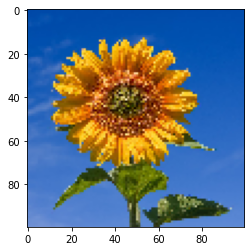

In [16]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

#load an image for prediction
img = load_img('images/sunflower_sample.jpg', target_size=(100,100))
plt.imshow(img)
plt.show()

In [17]:
#covert img to array and add dimension
img = img_to_array(img)
img = img.reshape(1,100,100,3)

In [18]:
#getting the prediction
result = model.predict(img)

In [19]:
#class labels from the iterator
class_labels = {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [20]:
#print prediction probablities
print(result)

[[0.01464567 0.03550408 0.02575757 0.86920816 0.05488448]]


In [21]:
#print the maximum probablity class
result = np.argmax(result)
print(result)

3


In [22]:
#print the class label
print([key for key in class_labels][result])

sunflower
